In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1

In [7]:
X_list =  []
Y_list = []
for i in np.arange(100):
    X = random.choice([-1,0,1])
    Y = random.choice([-1,0,1])
    if X ==0:
        Y = random.choice([-1,1])
    if Y==0:
        X = random.choice([-1,1])
    X_list.append(X)
    Y_list.append(Y)


(-1.5, 1.5)

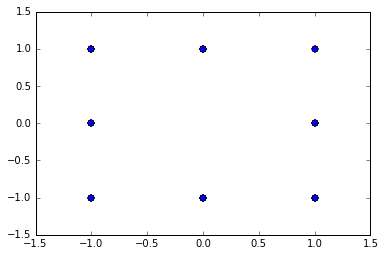

In [13]:
plt.plot(X_list,Y_list,'o')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

# Problem 2 

$$N(x) = \frac{1}{\sqrt{2\pi}\sqrt{|\Sigma|}} exp \Bigg(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\Bigg)$$

In [35]:
def compute_gaussian(x,y,cov,mu):
    X=np.vstack((x,y)).T
#     return 1./(sqrt(2*pi)*sqrt(np.abs(cov)))*np.exp(-0.5*np.dot((x-mu).T*np.inv(cov)*(x-mu)))
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(cov)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))
# np.random.multivariate_normal(mu,cov)
# 1./(sqrt(2*pi)*sqrt(np.abs(cov)))*np.exp(-0.5*(x-mu).T*np.inv(cov)*(x-mu))
# print cov 
# print mu

In [106]:
from scipy.interpolate import griddata
def plot_countour(x,y,z,xmin=-5,xmax = 5,ymin=-5,ymax = 5, title=""):#,ymin=-5, ymax=5):
    xi = np.linspace(-10,10, 100)
    yi = np.linspace(-10,10, 100)
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = np.linspace(0.2,1,11)
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.jet, levels=levels)
    plt.colorbar()  
    plt.title(title,fontsize = 14)
    plt.xlabel("x",fontsize = 14)
    plt.ylabel("y",fontsize = 14)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

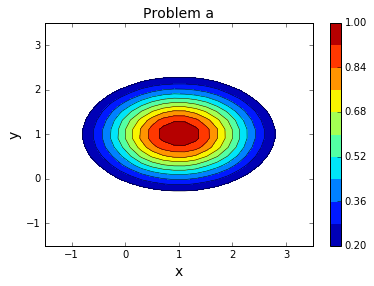

In [107]:
N=1000
cov = np.matrix([[2,0],[0,1]])
mu = np.array([1,1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-1.5,3.5,-1.5,3.5,title="Problem a")

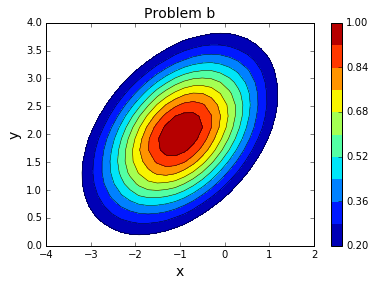

In [110]:
N=1000
cov = np.matrix([[3,1],[1,2]])
mu = np.array([-1,2])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-4,2,0,4,title="Problem b")

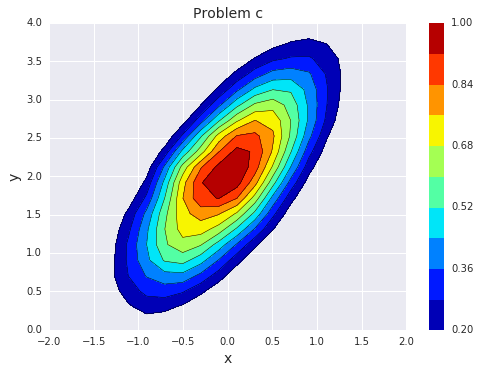

In [252]:
N=1000
cov = np.matrix([[1,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem c")

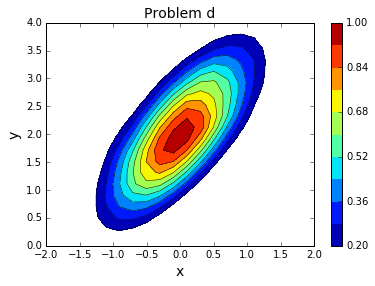

In [117]:
N=1000
cov = np.matrix([[1,1],[1,2]])
cov2 = np.matrix([[3,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem d")

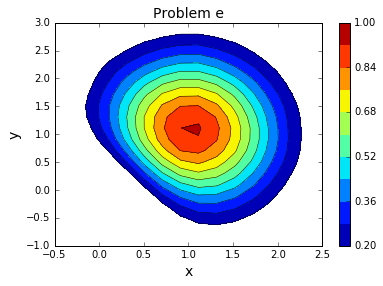

In [119]:
N=1000
cov = np.matrix([[1,0],[0,2]])
cov2 = np.matrix([[2,1],[1,2]])
mu1 = np.array([1,1])
mu2 = np.array([-1,-1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-0.5,2.5,-1,3,title="Problem e")

# Problem 3

In [253]:
X1 = []
X2 = []
mu1 = 3
sig1 = 9
mu2 = 4
sig2 = 4
for i in np.arange(100):
    X1.append(random.normal(mu1,sig1))
for i in np.arange(100):
    X2.append(random.normal(mu2,sig2))   
X1 = np.array(X1)
X2 = 0.5*np.array(X1) +np.array(X2)

In [254]:
print "Problem 3a: The mean of the sample X1 = ",mean(X1)
print "The mean of the sample X2 = ",mean(X2)

Problem 3a: The mean of the sample X1 =  1.61467943698
The mean of the sample X2 =  4.16933433029


Problem 3b) $$\Sigma = \left [ E[(X_1 - \mu_1)(X_1 - \mu_1)]  E[(X_1 - \mu_1)(X_2 - \mu_2)]  \\
\quad E[(X_2 - \mu_2)(X_1 - \mu_1)]  E[(X_2 - \mu_2)(X_2 - \mu_2)\right] $$

In [255]:
print "Covariance matrix ="
covmat = np.matrix([[mean((X1-mu1)*(X1-mu1)),mean((X1-mu1)*(X2-mu2))],[mean((X2-mu2)*(X1-mu1)),mean((X2-mu2)*(X2-mu2))]])
print covmat

Covariance matrix =
[[ 71.81202348  35.09837429]
 [ 35.09837429  32.38949129]]


Problem 3c) 

In [256]:
eigenvalue =  numpy.linalg.eig(covmat)[0]
eigenvector =  numpy.linalg.eig(covmat)[1]

In [257]:
print "Eigenvalue: " , eigenvalue
print "Eigenvector: " , eigenvector[0] ,"and" , eigenvector[1]

Eigenvalue:  [ 92.35532096  11.84619381]
Eigenvector:  [[ 0.8630369  -0.50514088]] and [[ 0.50514088  0.8630369 ]]


Problem 3d) 

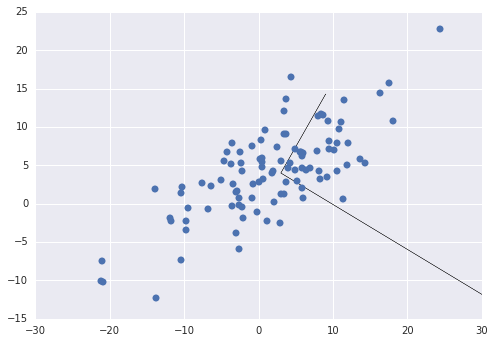

In [304]:
import seaborn 
fig, ax = plt.subplots()
plt.plot(X1,X2,'o')
# plt.xlim(-15,15)
# plt.ylim(-15,15)

dr =  eigenvalue[0] * np.array(eigenvector[0])
ax.arrow(mu1, mu2, dr[0][0], dr[0][1], head_width=0.05, head_length=0.1, fc='k', ec='k')
dr2 =  eigenvalue[1] * np.array(eigenvector[1])
ax.arrow(mu1, mu2, dr2[0][0], dr2[0][1], head_width=0.05, head_length=0.1, fc='k', ec='k')

Problem 3 e) 

# Problem 4

# Problem 5

# Problem 6

##References: 
- "Pylab_examples Example Code: Arrow_demo.py." Pylab_examples Example Code: Arrow_demo.py — Matplotlib 1.5.1 Documentation. N.p., n.d. Web. 21 Feb. 2016.
- "Matplotlib: Making 2D Gaussian Contours with Transparent Outermost Layer." _Python_. N.p., n.d. Web. 21 Feb. 2016.
- "Covariance Matrix." _Wikipedia_. Wikimedia Foundation, n.d. Web. 21 Feb. 2016.